In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import tree
from sklearn import tree
from sklearn.tree import export_graphviz

import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as img

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
df = pd.read_csv("Variable_selection.csv",encoding='latin-1')
print(df)



      ï»¿Country      Continent  Men Unemp  Women unemp  Total Unemp  \
0    Afghanistan           Asia        7.6          9.5         17.1   
1        Albania         Europe       12.2         15.9         28.1   
2        Algeria         Africa        8.1         19.1         27.2   
3      Argentina  South America        6.2          8.5         14.7   
4          Aruba  South America        5.0          6.5         11.5   
..           ...            ...        ...          ...          ...   
147      Uruguay  South America        4.5          7.7         12.2   
148      Vanuatu        Oceania        4.1          5.2          9.3   
149    Venezuela  South America        7.7          9.3         17.0   
150     Viet Nam           Asia        1.7          2.4          4.1   
151     Zimbabwe         Africa        4.2          4.1          8.3   

          GDP  Urban Pop  Rural Pop  women/100 men  Infant Mortality Rate  \
0      585.62      23.82      76.18          77.18        

Pearson correlation coefficient matrix for each independent variable: 
                        Men Unemp  Women unemp  Total Unemp       GDP  \
Men Unemp               1.000000     0.878743     0.961899 -0.129128   
Women unemp             0.878743     1.000000     0.975757 -0.197328   
Total Unemp             0.961899     0.975757     1.000000 -0.172244   
GDP                    -0.129128    -0.197328    -0.172244  1.000000   
Urban Pop               0.044235     0.006315     0.023900  0.565648   
Rural Pop              -0.044240    -0.006322    -0.023907 -0.565651   
women/100 men           0.038635    -0.118576    -0.050207 -0.011756   
Infant Mortality Rate   0.013593     0.019575     0.017446 -0.484506   
men/100 women          -0.168308    -0.030828    -0.094835  0.284569   

                       Urban Pop  Rural Pop  women/100 men  \
Men Unemp               0.044235  -0.044240       0.038635   
Women unemp             0.006315  -0.006322      -0.118576   
Total Unemp          

C:\Users\sujat\AppData\Local\Temp\ipykernel_100488\3418248270.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  masking = np.zeros_like(corr, dtype = np.bool)


NameError: name 'sns' is not defined

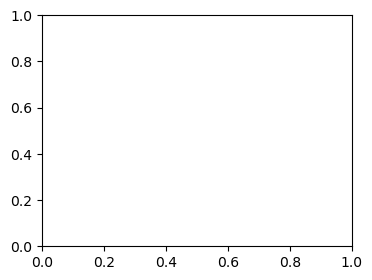

In [12]:

# Visualizing multicollinearity between independent features using a heatmap  
  
corr = df.corr(method="pearson");
print('Pearson correlation coefficient matrix for each independent variable: \n', corr)  
  
# Masking the diagonal cells   
masking = np.zeros_like(corr, dtype = np.bool)  
np.fill_diagonal(masking, val = True)  
  
# Initializing a matplotlib figure  
figure, axis = plt.subplots(figsize = (4, 3))  
  
# Generating a custom colormap  
c_map = sns.diverging_palette(223, 14, as_cmap = True, sep = 100)  
c_map.set_bad('grey')  
  
# Displaying the heatmap with the masking and the correct aspect ratio  
sns.heatmap(corr, mask = masking, cmap = c_map, vmin = -1, vmax = 1, center = 1, linewidths = 1)  
figure.suptitle('Heatmap visualizing Pearson Correlation Coefficient Matrix', fontsize = 14)  
axis.tick_params(axis = 'both', which = 'major', labelsize = 10)  

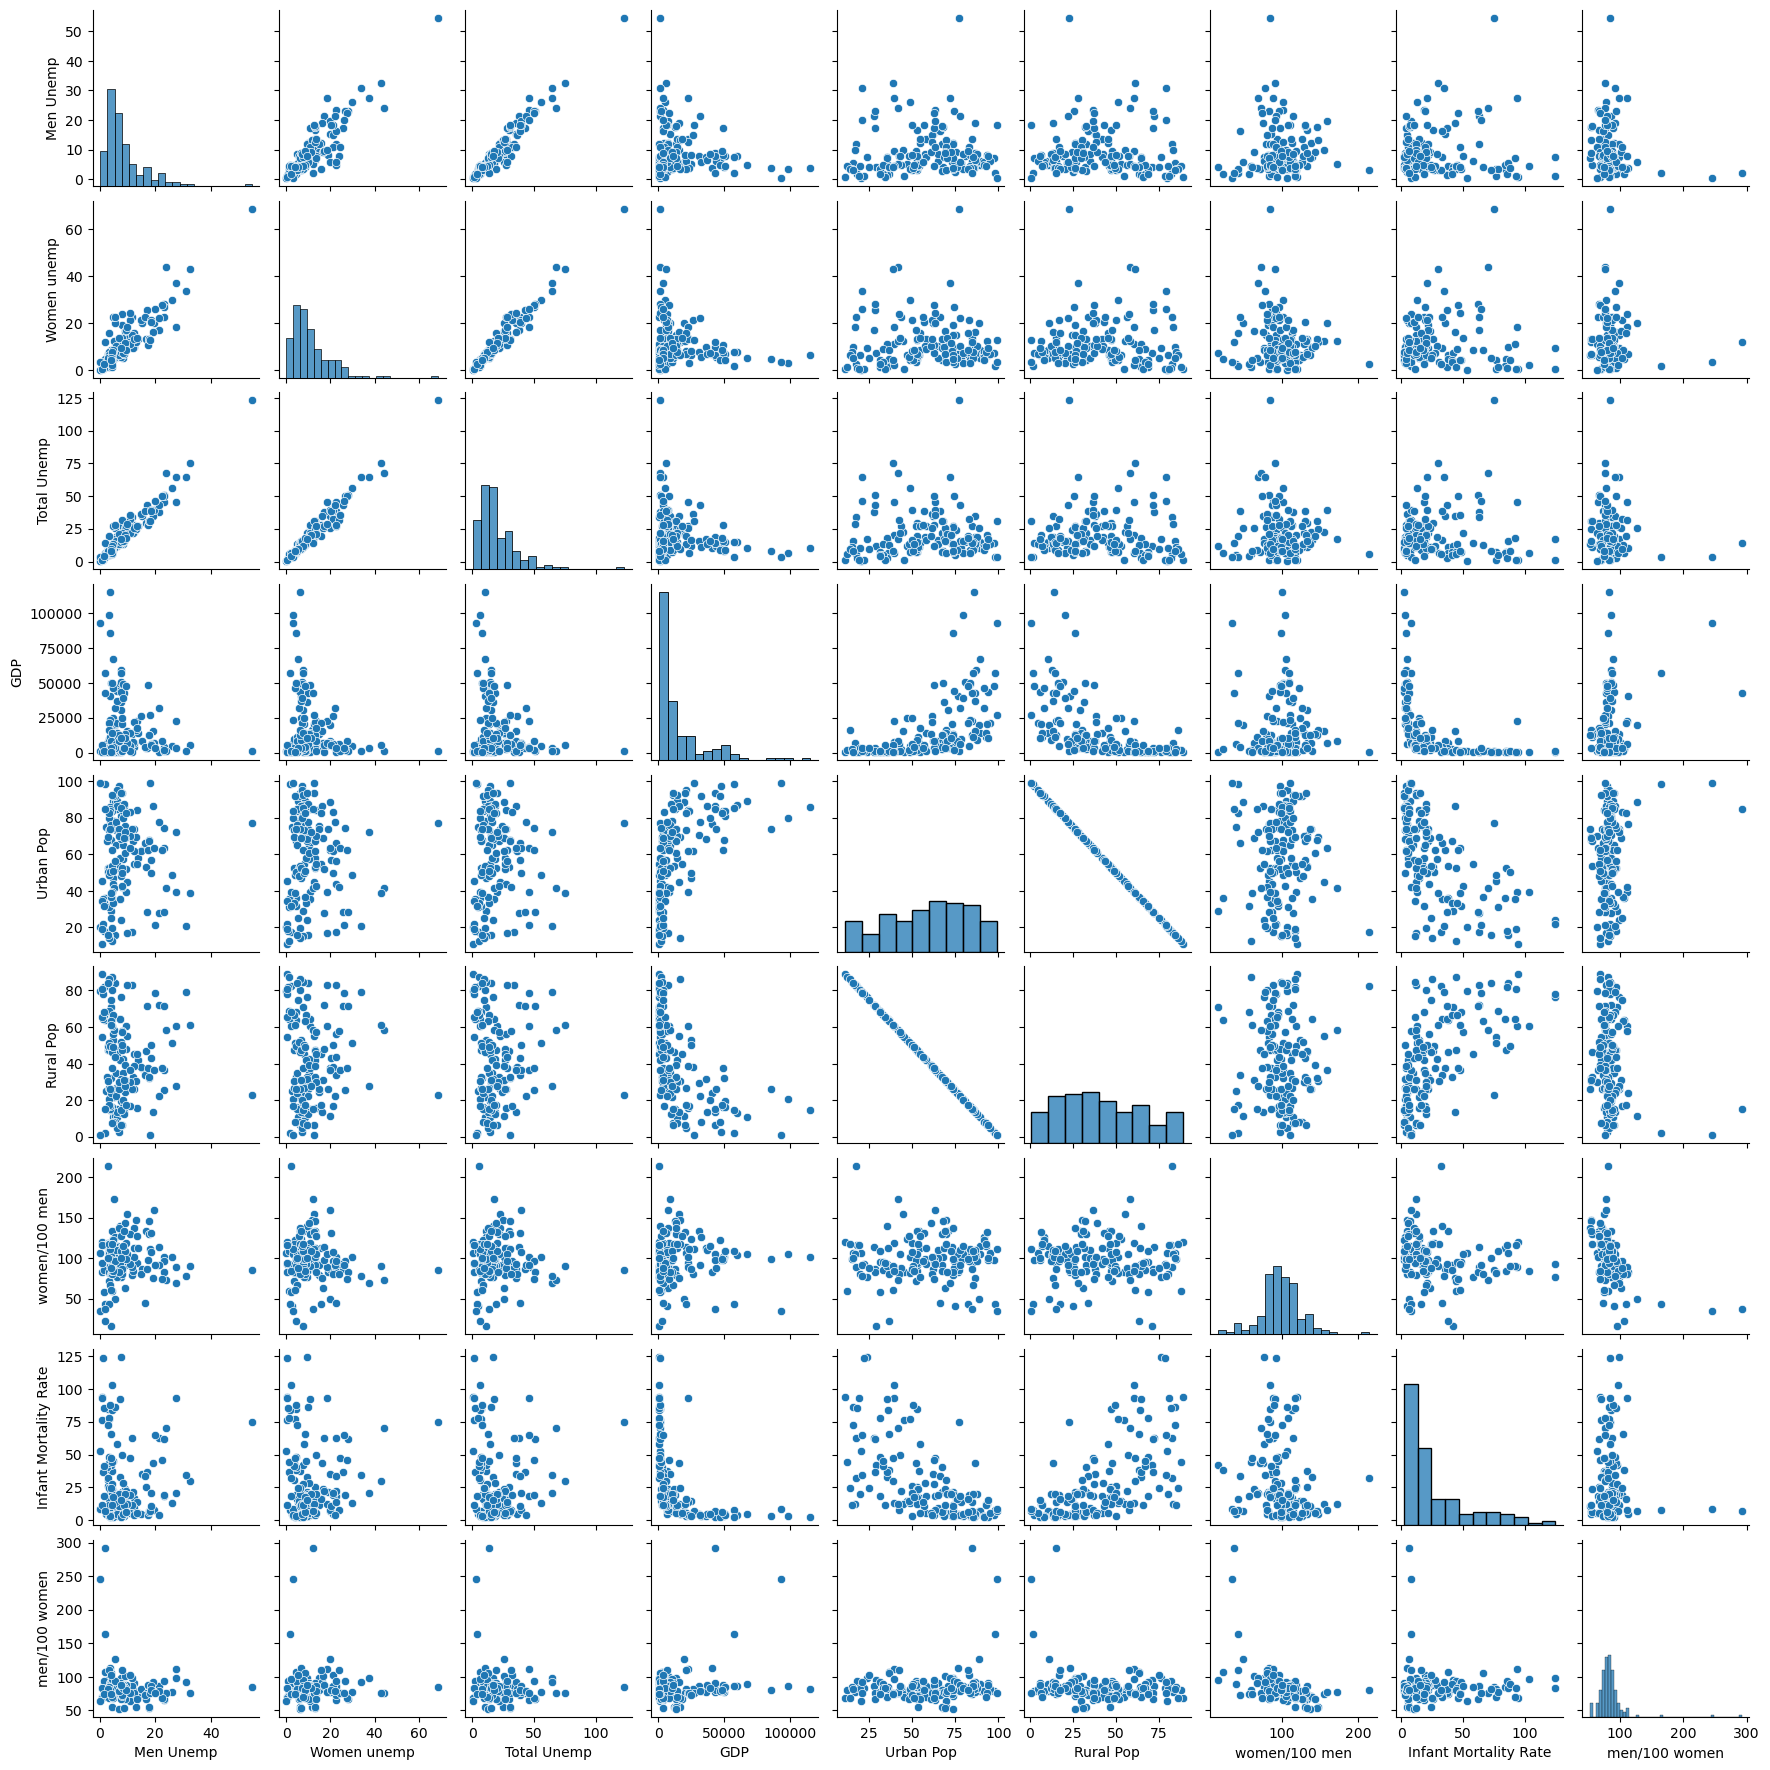

In [87]:
# For data visualization  
import seaborn as sns  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline  

# Visualizing the relationships between features using pair plots  
sns.pairplot(data = df, height = 2)  

In [13]:
#continents assignment

c1 = 'North America'
c2 = 'Europe'
c3 = 'Asia'
c4 = 'Africa'
c5= 'South America'
c6 = 'Oceania'

In [14]:
#creating a subset of data witnb only c1 as continent

df1 = df[df['Continent']==c1]
print(df1.head(10))

     ï»¿Country      Continent  Men Unemp  Women unemp  Total Unemp       GDP  \
8       Bahamas  North America       13.6         13.7         27.3  22431.03   
11     Barbados  North America        9.8         12.5         22.3  15744.46   
24       Canada  North America        7.8          7.0         14.8  50564.51   
31   Costa Rica  North America        6.0         10.3         16.3   8675.83   
33         Cuba  North America        2.4          2.7          5.1   6106.00   
38     Dominica  North America       12.0          9.5         21.5   7321.76   
40  El Salvador  North America        8.4          5.1         13.5   3701.99   
52      Grenada  North America        9.6         10.9         20.5   7867.71   
53    Guatemala  North America        2.9          6.6          9.5   3177.97   
56        Haiti  North America        6.2          8.3         14.5    664.92   

    Urban Pop  Rural Pop  women/100 men  Infant Mortality Rate  Men_Label  \
8       84.45      15.55       

In [15]:
#creating a subset of data witnb only c2 as continent

df2 = df[df['Continent']==c2]
print(df2.head(10))

                ï»¿Country Continent  Men Unemp  Women unemp  Total Unemp  \
1                  Albania    Europe       12.2         15.9         28.1   
6                  Austria    Europe        4.0          4.3          8.3   
12                 Belgium    Europe        7.1          7.2         14.3   
16  Bosnia and Herzegovina    Europe       26.0         29.9         55.9   
20                Bulgaria    Europe       12.3         10.0         22.3   
32                 Croatia    Europe       13.7         13.2         26.9   
35          Czech Republic    Europe        5.8          7.9         13.7   
36                 Denmark    Europe        7.7          7.5         15.2   
42                 Estonia    Europe       13.1         11.8         24.9   
45                 Finland    Europe        8.3          7.1         15.4   

         GDP  Urban Pop  Rural Pop  women/100 men  Infant Mortality Rate  \
1    4042.31      54.52      45.48         113.10                  16.56   


In [16]:
#creating a subset of data witnb only c3 as continent

df3 = df[df['Continent']==c3]
print(df3.head(10))

           ï»¿Country Continent  Men Unemp  Women unemp  Total Unemp  \
0         Afghanistan      Asia        7.6          9.5         17.1   
7          Azerbaijan      Asia        4.5          6.4         10.9   
9             Bahrain      Asia        5.6         20.0         25.6   
10         Bangladesh      Asia        4.2          7.4         11.6   
14             Bhutan      Asia        1.8          4.5          6.3   
19  Brunei Darussalam      Asia        3.7          6.7         10.4   
22           Cambodia      Asia        0.3          0.1          0.4   
34             Cyprus      Asia        7.8          7.7         15.5   
60              India      Asia        3.3          4.3          7.6   
61               Iran      Asia        9.1         16.8         25.9   

         GDP  Urban Pop  Rural Pop  women/100 men  Infant Mortality Rate  \
0     585.62      23.82      76.18          77.18                 124.54   
7    6813.18      53.86      46.14         133.05      

In [17]:
#creating a subset of data witnb only c4 as continent

df4 = df[df['Continent']==c4]
print(df4.head(10))

    ï»¿Country Continent  Men Unemp  Women unemp  Total Unemp      GDP  \
2      Algeria    Africa        8.1         19.1         27.2  5523.45   
13       Benin    Africa        0.9          0.4          1.3   801.64   
17    Botswana    Africa       15.3         19.9         35.2  8532.68   
21     Burundi    Africa        0.7          0.3          1.0   272.86   
23    Cameroon    Africa        3.1          4.5          7.6  1318.52   
25  Cape Verde    Africa       23.3         22.6         45.9  3772.74   
26        Chad    Africa        1.1          0.3          1.4   906.71   
29     Comoros    Africa       21.3         16.9         38.2   809.23   
37    Djibouti    Africa       54.6         68.6        123.2  1417.31   
39       Egypt    Africa        4.9         22.6         27.5  2801.44   

    Urban Pop  Rural Pop  women/100 men  Infant Mortality Rate  Men_Label  \
2       73.84      26.16          82.35                  21.46      Worst   
13      45.57      54.43       

In [18]:
#creating a subset of data witnb only c5 as continent

df5 = df[df['Continent']==c5]
print(df5.head(10))

    ï»¿Country      Continent  Men Unemp  Women unemp  Total Unemp       GDP  \
3    Argentina  South America        6.2          8.5         14.7  10993.99   
4        Aruba  South America        5.0          6.5         11.5  24752.93   
15     Bolivia  South America        2.6          4.4          7.0   2373.95   
18      Brazil  South America        6.1         11.0         17.1  12593.89   
27       Chile  South America        6.1          8.7         14.8  14394.84   
28    Colombia  South America        9.1         15.0         24.1   7100.05   
55      Guyana  South America       17.2         25.7         42.9   3408.02   
108   Paraguay  South America        4.4          7.4         11.8   3484.95   
109       Peru  South America        5.8         10.1         15.9   6138.26   
133   Suriname  South America        7.0         13.7         20.7   8708.46   

     Urban Pop  Rural Pop  women/100 men  Infant Mortality Rate  Men_Label  \
3        92.67       7.33         114.54 

In [19]:
#creating a subset of data witnb only c6 as continent

df6 = df[df['Continent']==c6]
print(df6.head(10))

           ï»¿Country Continent  Men Unemp  Women unemp  Total Unemp  \
5           Australia   Oceania        4.9          5.3         10.2   
30       Cook Islands   Oceania       11.7         14.8         26.5   
44               Fiji   Oceania        6.4         12.9         19.3   
85   Marshall Islands   Oceania       27.6         37.3         64.9   
98        New Zealand   Oceania        6.3          6.8         13.1   
105             Palau   Oceania        3.7          4.9          8.6   
107  Papua New Guinea   Oceania        4.3          1.3          5.6   
121             Samoa   Oceania        4.4          6.2         10.6   
129   Solomon Islands   Oceania       31.0         33.7         64.7   
141            Tuvalu   Oceania        4.9          8.6         13.5   

          GDP  Urban Pop  Rural Pop  women/100 men  Infant Mortality Rate  \
5    67039.08      89.35      10.65         105.71                   4.46   
30   13478.04      73.77      26.23          79.58   

In [ ]:
#Based on the image above, we can see that there are a number of clear separations in the data. 
#This can be quite helpful in splitting our data into pure splits using a decision tree classifier.

In [20]:

X = df[['Women unemp','Total Unemp','GDP','Urban Pop','Rural Pop','women/100 men','Infant Mortality Rate']]

y = df['Men_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X

,Women unemp,Total Unemp,GDP,Urban Pop,Rural Pop,women/100 men,Infant Mortality Rate
0,9.5,17.1,585.62,23.82,76.18,77.18,124.54
1,15.9,28.1,4042.31,54.52,45.48,113.10,16.56
2,19.1,27.2,5523.45,73.84,26.16,82.35,21.46
3,8.5,14.7,10993.99,92.67,7.33,114.54,12.34
4,6.5,11.5,24752.93,46.93,53.07,124.16,14.69
...,...,...,...,...,...,...,...
147,7.7,12.2,13819.44,92.64,7.36,117.45,11.75
148,5.2,9.3,3167.80,25.21,74.80,87.99,24.14
149,9.3,17.0,10731.20,93.74,6.26,100.25,15.28
150,2.4,4.1,1392.02,31.67,68.33,57.67,18.26


In [21]:
X1 = df1[['Women unemp','Total Unemp','GDP','Urban Pop','Rural Pop','women/100 men','Infant Mortality Rate']]

y1 = df1['Men_Label']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
X1

,Women unemp,Total Unemp,GDP,Urban Pop,Rural Pop,women/100 men,Infant Mortality Rate
8,13.7,27.3,22431.03,84.45,15.55,94.22,14.14
11,12.5,22.3,15744.46,44.93,55.07,154.58,12.28
24,7.0,14.8,50564.51,80.76,19.24,109.07,4.93
31,10.3,16.3,8675.83,65.12,34.88,99.82,9.17
33,2.7,5.1,6106.00,75.13,24.87,40.69,4.96
38,9.5,21.5,7321.76,67.25,32.75,83.98,21.59
40,5.1,13.5,3701.99,65.27,34.73,110.59,19.01
52,10.9,20.5,7867.71,39.47,60.53,118.47,13.04
53,6.6,9.5,3177.97,50.22,49.78,119.16,26.27
56,8.3,14.5,664.92,54.80,45.20,76.15,58.26


In [22]:
X2 = df2[['Women unemp','Total Unemp','GDP','Urban Pop','Rural Pop','women/100 men','Infant Mortality Rate']]

y2 = df2['Men_Label']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)
X2

,Women unemp,Total Unemp,GDP,Urban Pop,Rural Pop,women/100 men,Infant Mortality Rate
1,15.9,28.1,4042.31,54.52,45.48,113.10,16.56
6,4.3,8.3,49686.10,67.86,32.14,101.93,3.71
12,7.2,14.3,47807.27,97.52,2.48,97.55,3.74
16,29.9,55.9,4807.05,48.79,51.21,101.13,12.70
20,10.0,22.3,7186.83,73.70,26.30,137.76,9.15
32,13.2,26.9,14217.36,58.08,41.92,112.59,5.57
35,7.9,13.7,20606.66,73.38,26.62,113.76,3.00
36,7.5,15.2,59580.70,87.07,12.93,103.96,3.91
42,11.8,24.9,16541.52,69.54,30.46,147.43,4.38
45,7.1,15.4,48887.30,83.82,16.18,101.86,2.78


In [23]:
X3 = df3[['Women unemp','Total Unemp','GDP','Urban Pop','Rural Pop','women/100 men','Infant Mortality Rate']]

y3 = df3['Men_Label']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3)
X3.count()

Women unemp              36
Total Unemp              36
GDP                      36
Urban Pop                36
Rural Pop                36
women/100 men            36
Infant Mortality Rate    36
dtype: int64

In [24]:
X4 = df4[['Women unemp','Total Unemp','GDP','Urban Pop','Rural Pop','women/100 men','Infant Mortality Rate']]

y4 = df4['Men_Label']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3)
X4.count()

Women unemp              35
Total Unemp              35
GDP                      35
Urban Pop                35
Rural Pop                35
women/100 men            35
Infant Mortality Rate    35
dtype: int64

In [25]:
X5 = df5[['Women unemp','Total Unemp','GDP','Urban Pop','Rural Pop','women/100 men','Infant Mortality Rate']]

y5 = df5['Men_Label']

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3)
X5

,Women unemp,Total Unemp,GDP,Urban Pop,Rural Pop,women/100 men,Infant Mortality Rate
3,8.5,14.7,10993.99,92.67,7.33,114.54,12.34
4,6.5,11.5,24752.93,46.93,53.07,124.16,14.69
15,4.4,7.0,2373.95,67.24,32.76,91.07,40.68
18,11.0,17.1,12593.89,84.90,15.10,86.21,19.02
27,8.7,14.8,14394.84,89.38,10.62,115.08,6.79
28,15.0,24.1,7100.05,75.58,24.43,91.94,16.67
55,25.7,42.9,3408.02,28.44,71.56,86.78,36.83
108,7.4,11.8,3484.95,62.47,37.53,93.46,27.38
109,10.1,15.9,6138.26,77.60,22.40,110.14,18.27
133,13.7,20.7,8708.46,70.14,29.86,83.09,19.78


In [26]:
X6 = df6[['Women unemp','Total Unemp','GDP','Urban Pop','Rural Pop','women/100 men','Infant Mortality Rate']]

y6 = df6['Men_Label']

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2)
X6

,Women unemp,Total Unemp,GDP,Urban Pop,Rural Pop,women/100 men,Infant Mortality Rate
5,5.3,10.2,67039.08,89.35,10.65,105.71,4.46
30,14.8,26.5,13478.04,73.77,26.23,79.58,11.55
44,12.9,19.3,4390.51,52.63,47.37,91.42,17.22
85,37.3,64.9,3448.16,72.15,27.85,69.54,21.00
98,6.8,13.1,36874.44,86.27,13.73,110.08,4.76
105,4.9,8.6,11096.23,85.06,14.94,67.18,20.08
107,1.3,5.6,1794.48,12.51,87.49,59.71,44.47
121,6.2,10.6,3629.33,19.64,80.36,80.71,19.85
129,33.7,64.7,1517.65,20.92,79.08,78.10,34.57
141,8.6,13.5,3712.65,50.98,49.02,84.15,17.32


In [27]:
# How to Import the DecisionTreeClassifer Class
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(

    criterion='gini', 
    splitter='best', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0
)

DecisionTreeClassifier()

In [28]:
# Creating Our First Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#created our Decision Tree Classifier model and assigned it to the variable
# then applied the .fit() method to train the model. In order to do this, we passed in our training data.

DecisionTreeClassifier()

In [29]:
# Creating Our First Decision Tree Classifier c1
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1.fit(X1_train, y1_train)

#created our Decision Tree Classifier model and assigned it to the variable
# then applied the .fit() method to train the model. In order to do this, we passed in our training data.

DecisionTreeClassifier()

In [30]:
# Creating Our First Decision Tree Classifier c2
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier()
clf2.fit(X2_train, y2_train)

#created our Decision Tree Classifier model and assigned it to the variable
# then applied the .fit() method to train the model. In order to do this, we passed in our training data.

DecisionTreeClassifier()

In [31]:
# Creating Our First Decision Tree Classifier c3
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier()
clf3.fit(X3_train, y3_train)

#created our Decision Tree Classifier model and assigned it to the variable
# then applied the .fit() method to train the model. In order to do this, we passed in our training data.

DecisionTreeClassifier()

In [32]:
# Creating Our First Decision Tree Classifier c4
from sklearn.tree import DecisionTreeClassifier
clf4 = DecisionTreeClassifier()
clf4.fit(X4_train, y4_train)

#created our Decision Tree Classifier model and assigned it to the variable
# then applied the .fit() method to train the model. In order to do this, we passed in our training data.

DecisionTreeClassifier()

In [33]:
# Creating Our First Decision Tree Classifier c5
from sklearn.tree import DecisionTreeClassifier
clf5 = DecisionTreeClassifier()
clf5.fit(X5_train, y5_train)

#created our Decision Tree Classifier model and assigned it to the variable
# then applied the .fit() method to train the model. In order to do this, we passed in our training data.

DecisionTreeClassifier()

In [34]:
# Creating Our First Decision Tree Classifier c6
from sklearn.tree import DecisionTreeClassifier
clf6 = DecisionTreeClassifier()
clf6.fit(X6_train, y6_train)

#created our Decision Tree Classifier model and assigned it to the variable
# then applied the .fit() method to train the model. In order to do this, we passed in our training data.

DecisionTreeClassifier()

In [35]:
# Making Predictions with Our Model
predictions = clf.predict(X_test)
print(predictions[:5])
print(y_test[:5])

['Worst' 'Worst' 'Worst' 'Worst' 'Worst']
149    Worst
59     Worst
105    Worst
113    Worst
70     Worst
Name: Men_Label, dtype: object


In [36]:
# Making Predictions with Our Model
predictions1 = clf1.predict(X1_test)
print(predictions1[:5])

['Worst' 'Worst' 'Worst' 'Improving']


In [37]:
# Making Predictions with Our Model
predictions2 = clf2.predict(X2_test)
print(predictions2[:5])

['Improving' 'Improving' 'Improving' 'Worst' 'Improving']


In [38]:
# Making Predictions with Our Model
predictions3 = clf3.predict(X3_test)
print(predictions3[:5])

['Worst' 'Worst' 'Worst' 'Worst' 'Worst']


In [39]:
# Making Predictions with Our Model
predictions4 = clf4.predict(X4_test)
print(predictions4[:5])

['Worst' 'Worst' 'Improving' 'Improving' 'Worst']


In [40]:
# Making Predictions with Our Model
predictions5 = clf5.predict(X5_test)
print(predictions5[:5])

['Worst' 'Improving' 'Worst' 'Worst']


In [41]:
# Making Predictions with Our Model
predictions6 = clf6.predict(X6_test)
print(predictions6[:5])

['Worst' 'Improving' 'Worst']


In [42]:
# Measuring the accuracy of our model
from sklearn.metrics import accuracy_score
print("Overall accuracy score",accuracy_score(y_test, predictions))


Overall accuracy score 0.9354838709677419


In [43]:
# Measuring the accuracy of our model
from sklearn.metrics import accuracy_score
print("C1 Continent accuracy score",accuracy_score(y1_test, predictions1))

C1 Continent accuracy score 1.0


In [44]:
# Measuring the accuracy of our model
from sklearn.metrics import accuracy_score
print("C2 Continent accuracy score",accuracy_score(y2_test, predictions2))

C2 Continent accuracy score 0.9166666666666666


In [45]:
# Measuring the accuracy of our model
from sklearn.metrics import accuracy_score
print("C3 Continent accuracy score",accuracy_score(y3_test, predictions3))

C3 Continent accuracy score 0.9090909090909091


In [46]:
# Measuring the accuracy of our model
from sklearn.metrics import accuracy_score
print("C4 Continent accuracy score",accuracy_score(y4_test, predictions4))

C4 Continent accuracy score 1.0


In [47]:
# Measuring the accuracy of our model
from sklearn.metrics import accuracy_score
print("C5 Continent accuracy score",accuracy_score(y5_test, predictions5))

C5 Continent accuracy score 0.75


In [48]:
# Measuring the accuracy of our model
from sklearn.metrics import accuracy_score
print("C6 Continent accuracy score",accuracy_score(y6_test, predictions6))

C6 Continent accuracy score 0.6666666666666666


In [49]:
accuracy = accuracy_score(y_test,predictions)
report = classification_report(predictions, y_test)
cm = confusion_matrix(y_test, predictions)

In [50]:
print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.9354838709677419
              precision    recall  f1-score   support

   Improving       0.89      0.89      0.89         9
       Worst       0.95      0.95      0.95        22

    accuracy                           0.94        31
   macro avg       0.92      0.92      0.92        31
weighted avg       0.94      0.94      0.94        31

Confusion matrix:
[[ 8  1]
 [ 1 21]]


In [51]:
accuracy1 = accuracy_score(y1_test,predictions1)
report1 = classification_report(predictions1, y1_test)
cm1 = confusion_matrix(y1_test, predictions1)

In [52]:
print("Classification report:")
print("Accuracy: ", accuracy1)
print(report1)
print("Confusion matrix:")
print(cm1)

Classification report:
Accuracy:  1.0
              precision    recall  f1-score   support

   Improving       1.00      1.00      1.00         1
       Worst       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion matrix:
[[1 0]
 [0 3]]


In [53]:
accuracy2 = accuracy_score(y2_test,predictions2)
report2 = classification_report(predictions2, y2_test)
cm2 = confusion_matrix(y2_test, predictions2)

In [54]:
print("Classification report:")
print("Accuracy: ", accuracy2)
print(report2)
print("Confusion matrix:")
print(cm2)

Classification report:
Accuracy:  0.9166666666666666
              precision    recall  f1-score   support

   Improving       0.83      1.00      0.91         5
       Worst       1.00      0.86      0.92         7

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12

Confusion matrix:
[[5 1]
 [0 6]]


In [55]:
accuracy3 = accuracy_score(y3_test,predictions3)
report3 = classification_report(predictions3, y3_test)
cm3 = confusion_matrix(y3_test, predictions3)

In [56]:
print("Classification report:")
print("Accuracy: ", accuracy3)
print(report3)
print("Confusion matrix:")
print(cm3)

Classification report:
Accuracy:  0.9090909090909091
              precision    recall  f1-score   support

   Improving       0.50      1.00      0.67         1
       Worst       1.00      0.90      0.95        10

    accuracy                           0.91        11
   macro avg       0.75      0.95      0.81        11
weighted avg       0.95      0.91      0.92        11

Confusion matrix:
[[1 1]
 [0 9]]


In [57]:
accuracy4 = accuracy_score(y4_test,predictions4)
report4 = classification_report(predictions4, y4_test)
cm4 = confusion_matrix(y4_test, predictions4)

In [58]:
print("Classification report:")
print("Accuracy: ", accuracy4)
print(report4)
print("Confusion matrix:")
print(cm4)

Classification report:
Accuracy:  1.0
              precision    recall  f1-score   support

   Improving       1.00      1.00      1.00         4
       Worst       1.00      1.00      1.00         7

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Confusion matrix:
[[4 0]
 [0 7]]


In [59]:
accuracy5 = accuracy_score(y5_test,predictions5)
report5 = classification_report(predictions5, y5_test)
cm5 = confusion_matrix(y5_test, predictions5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
print("Classification report:")
print("Accuracy: ", accuracy5)
print(report5)
print("Confusion matrix:")
print(cm5)

Classification report:
Accuracy:  0.75
              precision    recall  f1-score   support

   Improving       0.00      0.00      0.00         1
       Worst       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

Confusion matrix:
[[0 0]
 [1 3]]


In [61]:
accuracy6 = accuracy_score(y6_test,predictions6)
report6 = classification_report(predictions6, y6_test)
cm6 = confusion_matrix(y6_test, predictions6)

In [62]:
print("Classification report:")
print("Accuracy: ", accuracy6)
print(report6)
print("Confusion matrix:")
print(cm6)

Classification report:
Accuracy:  0.6666666666666666
              precision    recall  f1-score   support

   Improving       0.50      1.00      0.67         1
       Worst       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Confusion matrix:
[[1 1]
 [0 1]]


[Text(0.359375, 0.9166666666666666, 'X[1] <= 19.35\ngini = 0.443\nsamples = 121\nvalue = [40, 81]'),
 Text(0.125, 0.75, 'X[1] <= 17.55\ngini = 0.026\nsamples = 75\nvalue = [1, 74]'),
 Text(0.0625, 0.5833333333333334, 'gini = 0.0\nsamples = 69\nvalue = [0, 69]'),
 Text(0.1875, 0.5833333333333334, 'X[1] <= 18.0\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.125, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.59375, 0.75, 'X[1] <= 21.7\ngini = 0.258\nsamples = 46\nvalue = [39, 7]'),
 Text(0.4375, 0.5833333333333334, 'X[0] <= 11.9\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.5833333333333334, 'X[5] <= 83.65\ngini = 0.145\nsamples = 38\nvalue = [35, 3]'),
 Text(0.625, 0.4166666666666667, 'X[5] <= 80.69\ngini = 0.346\nsampl

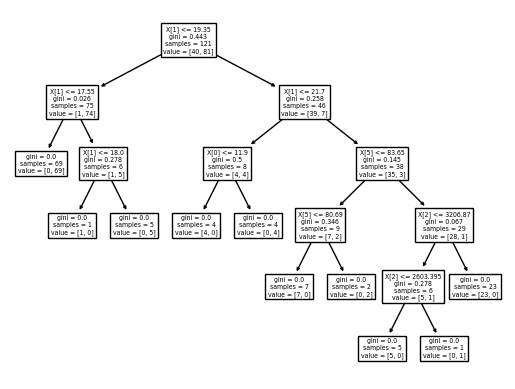

In [63]:
a = tree.plot_tree(clf);
a

In [64]:
#decision tree visualization
TREE_MODEL = clf.fit(X_train, y_train)
cols = list(X_train.columns.values)
tree_graph = export_graphviz(TREE_MODEL, filled=True, rounded=True, special_characters=True,feature_names = cols)
#print(tree_graph)
dec_tree_image = pydotplus.graph_from_dot_data(tree_graph)
dec_tree_image.write_png('Overall_Tree.png')

True

In [65]:
#decision tree visualization
TREE_MODEL1 = clf1.fit(X1_train, y1_train)
cols1 = list(X1_train.columns.values)
tree_graph1 = export_graphviz(TREE_MODEL1, filled=True, rounded=True, special_characters=True,feature_names = cols1)
#print(tree_graph)
dec_tree_image = pydotplus.graph_from_dot_data(tree_graph1)
dec_tree_image.write_png('Tree_Continent1.png')

True

In [68]:
#decision tree visualization
TREE_MODEL2 = clf.fit(X2_train, y2_train)
cols2 = list(X2_train.columns.values)
tree_graph2 = export_graphviz(TREE_MODEL2, filled=True, rounded=True, special_characters=True,feature_names = cols2)
#print(tree_graph)
dec_tree_image2 = pydotplus.graph_from_dot_data(tree_graph2)
dec_tree_image2.write_png('Tree_Continent2.png')

True

In [69]:
#decision tree visualization
TREE_MODEL3 = clf.fit(X3_train, y3_train)
cols3 = list(X3_train.columns.values)
tree_graph3 = export_graphviz(TREE_MODEL3, filled=True, rounded=True, special_characters=True,feature_names = cols3)
#print(tree_graph)
dec_tree_image3 = pydotplus.graph_from_dot_data(tree_graph3)
dec_tree_image3.write_png('Tree_Continent3.png')

True

In [70]:
#decision tree visualization
TREE_MODEL4 = clf.fit(X4_train, y4_train)
cols4 = list(X4_train.columns.values)
tree_graph4 = export_graphviz(TREE_MODEL4, filled=True, rounded=True, special_characters=True,feature_names = cols4)
#print(tree_graph)
dec_tree_image4 = pydotplus.graph_from_dot_data(tree_graph4)
dec_tree_image4.write_png('Tree_Continent4.png')

True

In [71]:
#decision tree visualization
TREE_MODEL5 = clf.fit(X5_train, y5_train)
cols5 = list(X5_train.columns.values)
tree_graph5 = export_graphviz(TREE_MODEL5, filled=True, rounded=True, special_characters=True,feature_names = cols5)
#print(tree_graph)
dec_tree_image5 = pydotplus.graph_from_dot_data(tree_graph5)
dec_tree_image5.write_png('Tree_Continent5.png')

True

In [72]:
#decision tree visualization
TREE_MODEL6 = clf.fit(X6_train, y6_train)
cols6 = list(X6_train.columns.values)
tree_graph6 = export_graphviz(TREE_MODEL6, filled=True, rounded=True, special_characters=True,feature_names = cols6)
#print(tree_graph)
dec_tree_image6 = pydotplus.graph_from_dot_data(tree_graph6)
dec_tree_image6.write_png('Tree_Continent6.png')

True